In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    roc_curve,
    roc_auc_score
)

from sklearn.preprocessing import LabelEncoder

In [183]:
df = pd.read_csv('BitcoinHeistData.csv')

In [184]:
df.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [185]:
df['label'].unique()

array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

In [186]:
df['label'].value_counts()

,count
label,
white,2875284
paduaCryptoWall,12390
montrealCryptoLocker,9315
princetonCerber,9223
princetonLocky,6625
montrealCryptXXX,2419
montrealNoobCrypt,483
montrealDMALockerv3,354
montrealDMALocker,251


In [187]:
ransomware_counts = df['label'].value_counts()
print(ransomware_counts)

label
white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw        

<ipython-input-188-845d5a72ce33>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ransomware_counts.index, y=ransomware_counts.values, palette='viridis')


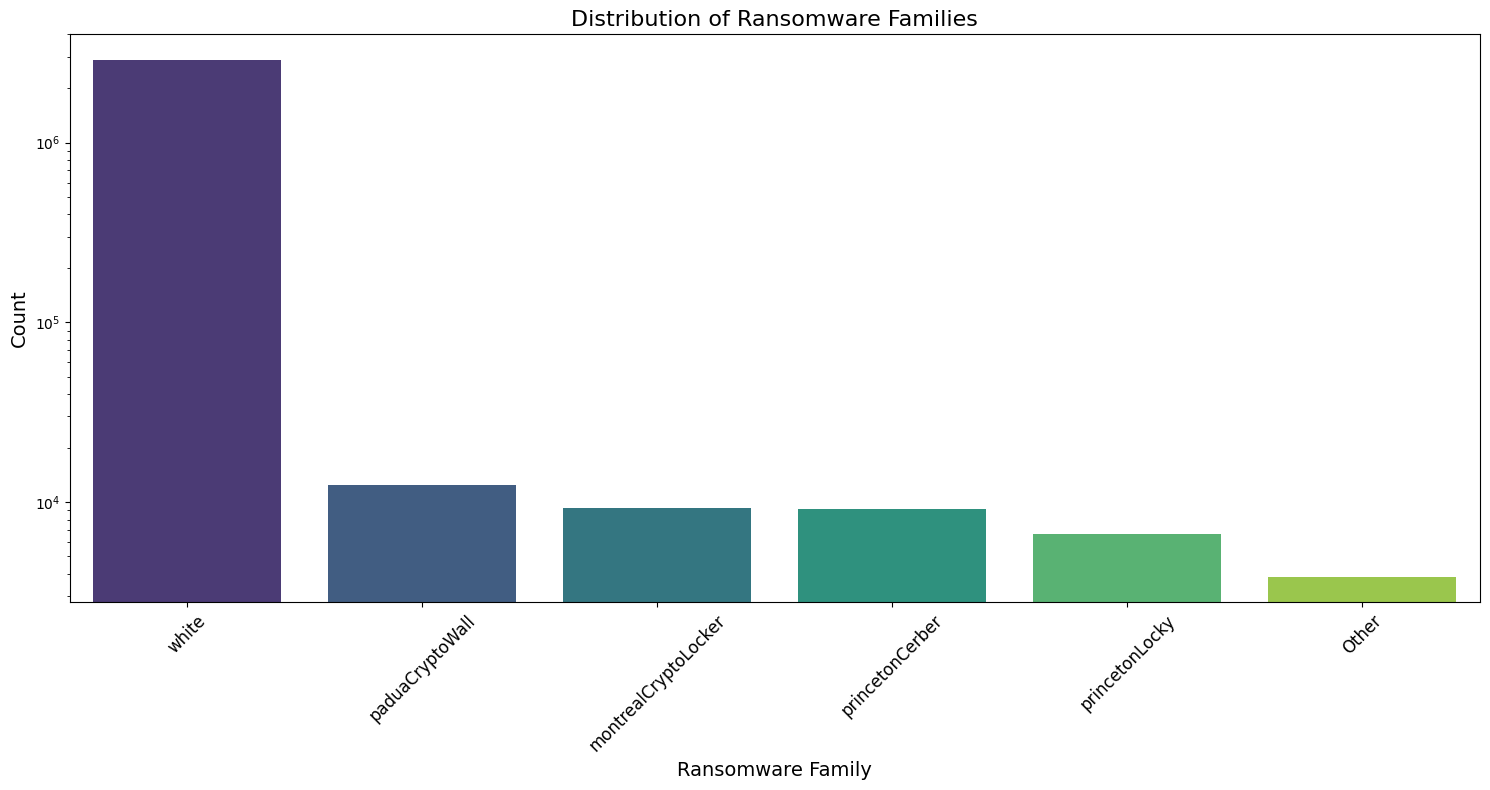

In [188]:
ransomware_counts = df['label'].value_counts()

other_count = ransomware_counts[ransomware_counts < 6625].sum()

ransomware_counts = ransomware_counts[ransomware_counts >= 6625]
ransomware_counts['Other'] = other_count

plt.figure(figsize=(15, 8))
sns.barplot(x=ransomware_counts.index, y=ransomware_counts.values, palette='viridis')

plt.xticks(rotation=45, fontsize=12)
plt.title('Distribution of Ransomware Families', fontsize=16)
plt.xlabel('Ransomware Family', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.yscale('log')

plt.tight_layout()
plt.show()

In [189]:

df['label'] = df['label'].apply(lambda x: 0 if x == 'white' else 1)

df.head()


,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,1
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,1
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,1
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,1
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,1


In [190]:
len(df[df['label']==1])

41413

In [191]:
len(df[df['label']==0])

2875284

# Significantly more of Non Ransomware



In [192]:
feature_with_label = df.columns
feature_without_label = feature_with_label[:-1]

In [193]:
y = df['label']
X = df.drop('label', axis=1)

In [194]:
X.head()

,address,year,day,length,weight,count,looped,neighbors,income
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0


In [195]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [196]:
# rf = randomforestclassifier()
# rf.fit(x_train, y_train)
# model.fit(x_train, y_train)
#
# y_pred = rf.predict(x_test)

## Encoding Data to be used as Numbers so we can run classifiers

In [197]:
label_encoder = LabelEncoder()

X['address'] = label_encoder.fit_transform(X['address'])

In [198]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [199]:
rf = RandomForestClassifier()
rf.fit(X_train[:1000], y_train[:1000])

y_pred = rf.predict(X_test[:1000])

In [200]:
accuracy = accuracy_score(y_test[:1000], y_pred)
report = classification_report(y_test[:1000], y_pred)

mse = mean_squared_error(y_test[:1000], y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [201]:
print(accuracy)

0.988


In [202]:
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       988
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1000
   macro avg       0.49      0.50      0.50      1000
weighted avg       0.98      0.99      0.98      1000



In [203]:
print(mse)

0.012


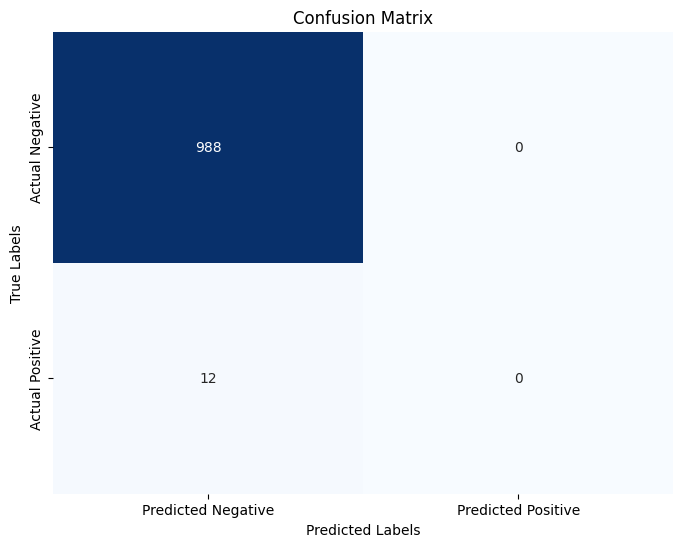

In [204]:
cm = confusion_matrix(y_test[:1000], y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### As you can see in the Confusion Matrix there is so much more true negatives making the positives being predicted as pos

In [205]:
def split_data(df_total):
    full_ransomware = df_total[df_total['label'] == 1]
    full_non_ransomware = df_total[df_total['label'] == 0]

    if len(full_ransomware) >= 1000:
        ransomware_sample = full_ransomware.sample(n=1000, random_state=42)
    else:
        ransomware_sample = full_ransomware

    if len(full_non_ransomware) >= 1000:
        non_ransomware_sample = full_non_ransomware.sample(n=1000, random_state=42)
    else:
        non_ransomware_sample = full_non_ransomware

    combined_df = pd.concat([ransomware_sample, non_ransomware_sample], ignore_index=True)

    return combined_df.reset_index(drop=True)


In [206]:
sampled_df = split_data(df)

In [207]:
sampled_df['address'] = label_encoder.fit_transform(sampled_df['address'])

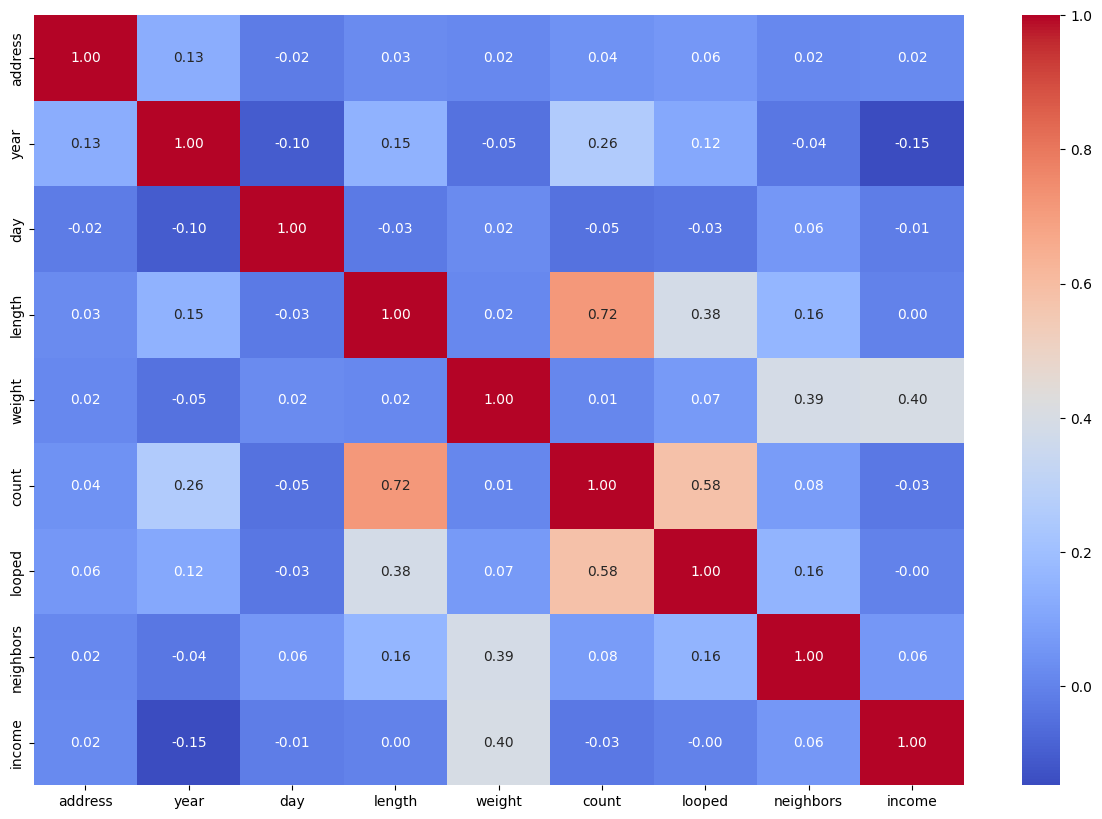

In [208]:
correlation_matrix = sampled_df[feature_without_label].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [209]:
sampled_df = sampled_df.drop('length', axis=1)

In [210]:
len(sampled_df)

2000

In [211]:
y = sampled_df['label']
X = sampled_df.drop('label', axis=1)

In [212]:
label_encoder = LabelEncoder()

X['address'] = label_encoder.fit_transform(X['address'])

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [214]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [215]:
rf_accuracy = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

In [216]:
print(rf_accuracy)

82.0


In [217]:
print(report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       201
           1       0.82      0.82      0.82       199

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [218]:
print(mse)

0.18


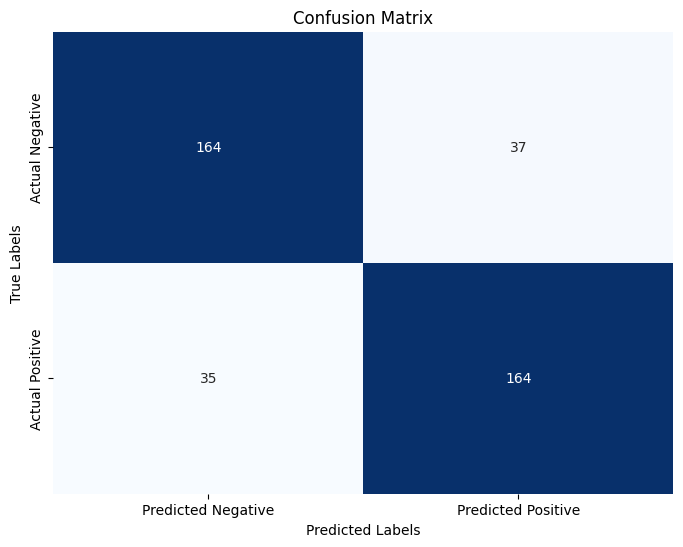

In [219]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

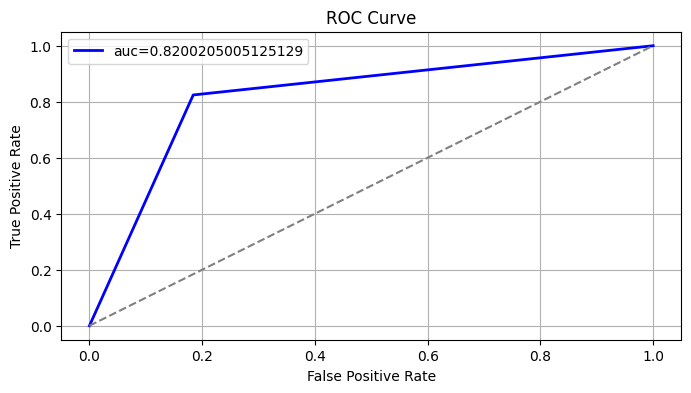

In [220]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label="auc="+str(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [221]:
clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X_test)

In [222]:
log_reg_accuracy = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

In [223]:
print(log_reg_accuracy)

59.25


In [224]:
print(report)

              precision    recall  f1-score   support

           0       0.68      0.36      0.47       201
           1       0.56      0.83      0.67       199

    accuracy                           0.59       400
   macro avg       0.62      0.59      0.57       400
weighted avg       0.62      0.59      0.57       400



In [225]:
print(mse)

0.4075


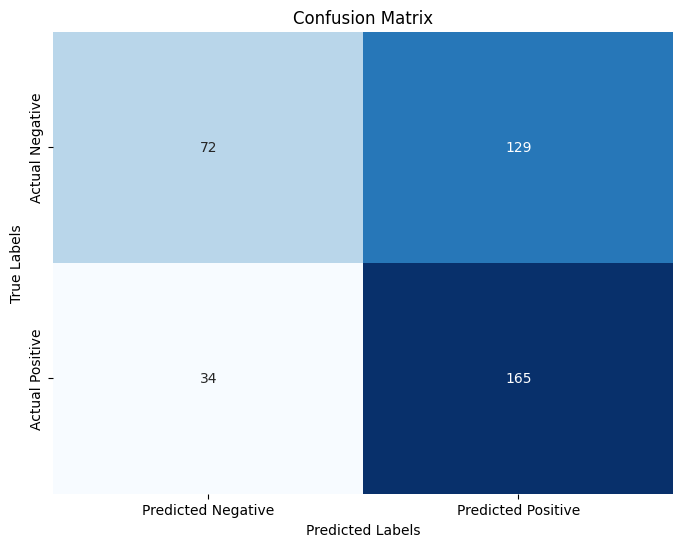

In [226]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

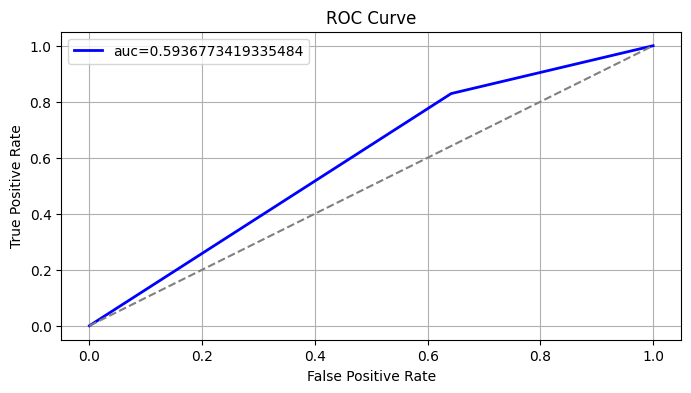

In [227]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label="auc="+str(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [228]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, y)

y_pred = knn.predict(X_test)

In [229]:
knn_accuracy = accuracy_score(y_test, y_pred)*100
report = classification_report(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

In [230]:
print(knn_accuracy)

81.75


In [231]:
print(report)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       201
           1       0.82      0.80      0.81       199

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [232]:
print(mse)

0.1825


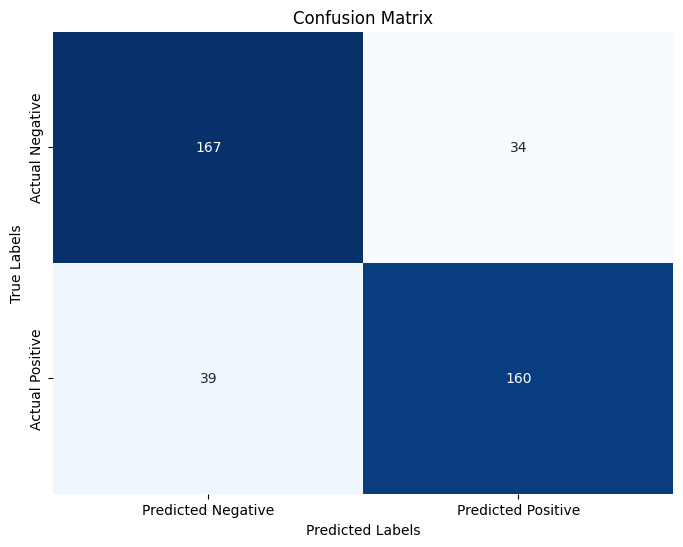

In [233]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

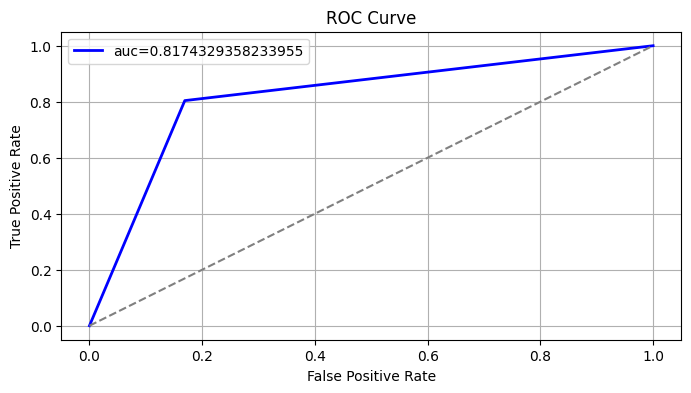

In [234]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label="auc="+str(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

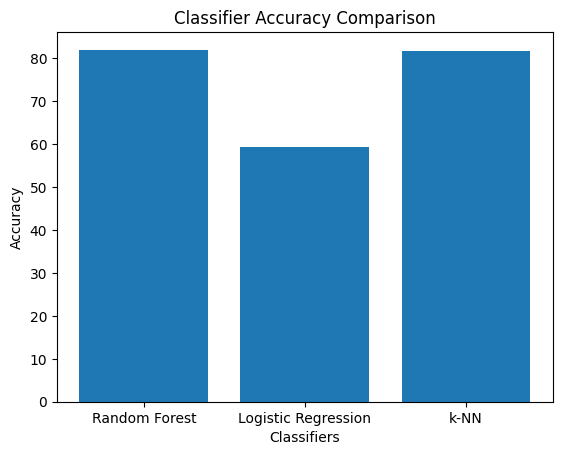

In [235]:
categories = ['Random Forest', 'Logistic Regression', 'k-NN']
values = [rf_accuracy, log_reg_accuracy, knn_accuracy]

plt.bar(categories, values)

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')

plt.show()